# 从生物到人工神经元

In [1]:
#from tensorflow.examples.tutorials.mnist import input_data
#import numpy as np

In [2]:
#mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

In [3]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=100, tol=-np.infty, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [4]:
per_clf.coef_

array([[-1.1, -1.2]])

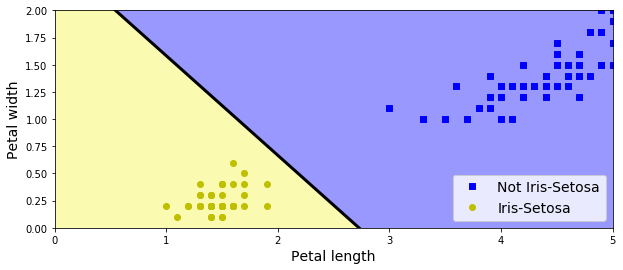

In [5]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0,5,0,2]
x0,x1 = np.meshgrid(
    np.linspace(axes[0],axes[1],500).reshape(-1,1),
    np.linspace(axes[2],axes[3],200).reshape(-1,1),
)
X_new = np.c_[x0.ravel(),x1.ravel()]
y_pred = per_clf.predict(X_new)
zz = y_pred.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[:,0][y==0], X[:,1][y==0], "bs", label="Not Iris-Setosa")
plt.plot(X[:,0][y==1], X[:,1][y==1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0,x1,zz,cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

plt.show()


In [6]:
import tensorflow as tf

In [7]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [8]:
feature_cols = [tf.feature_column.numeric_column("X", shape=[28 * 28])]
dnn_clf = tf.estimator.DNNClassifier(hidden_units=[300,100], n_classes=10,feature_columns=feature_cols)

input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_train}, y=y_train, num_epochs=40, batch_size=50, shuffle=True)
dnn_clf.train(input_fn=input_fn)



INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_id': 0, '_service': None, '_save_checkpoints_secs': 600, '_session_config': None, '_tf_random_seed': None, '_num_worker_replicas': 1, '_master': '', '_is_chief': True, '_save_checkpoints_steps': None, '_num_ps_replicas': 0, '_train_distribute': None, '_keep_checkpoint_every_n_hours': 10000, '_device_fn': None, '_task_type': 'worker', '_keep_checkpoint_max': 5, '_model_dir': 'C:\\Users\\ADMINI~1\\AppData\\Local\\Temp\\tmpyr_ovrmq', '_evaluation_master': '', '_log_step_count_steps': 100, '_global_id_in_cluster': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000016C642797B8>, '_save_summary_steps': 100}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 

INFO:tensorflow:global_step/sec: 426.96
INFO:tensorflow:loss = 0.32024032, step = 7200 (0.233 sec)
INFO:tensorflow:global_step/sec: 426.962
INFO:tensorflow:loss = 3.6064646, step = 7300 (0.234 sec)
INFO:tensorflow:global_step/sec: 426.963
INFO:tensorflow:loss = 0.063359484, step = 7400 (0.234 sec)
INFO:tensorflow:global_step/sec: 428.794
INFO:tensorflow:loss = 0.08709402, step = 7500 (0.233 sec)
INFO:tensorflow:global_step/sec: 430.643
INFO:tensorflow:loss = 0.43220347, step = 7600 (0.233 sec)
INFO:tensorflow:global_step/sec: 430.642
INFO:tensorflow:loss = 0.38964528, step = 7700 (0.231 sec)
INFO:tensorflow:global_step/sec: 430.643
INFO:tensorflow:loss = 2.1459877, step = 7800 (0.232 sec)
INFO:tensorflow:global_step/sec: 428.794
INFO:tensorflow:loss = 0.42079145, step = 7900 (0.234 sec)
INFO:tensorflow:global_step/sec: 432.508
INFO:tensorflow:loss = 2.8726957, step = 8000 (0.231 sec)
INFO:tensorflow:global_step/sec: 426.959
INFO:tensorflow:loss = 0.39579424, step = 8100 (0.234 sec)
INF

INFO:tensorflow:global_step/sec: 421.557
INFO:tensorflow:loss = 0.030006852, step = 15400 (0.236 sec)
INFO:tensorflow:global_step/sec: 425.145
INFO:tensorflow:loss = 0.21292864, step = 15500 (0.235 sec)
INFO:tensorflow:global_step/sec: 428.794
INFO:tensorflow:loss = 0.0048526684, step = 15600 (0.233 sec)
INFO:tensorflow:global_step/sec: 428.794
INFO:tensorflow:loss = 0.2693741, step = 15700 (0.233 sec)
INFO:tensorflow:global_step/sec: 425.145
INFO:tensorflow:loss = 0.06825709, step = 15800 (0.235 sec)
INFO:tensorflow:global_step/sec: 428.794
INFO:tensorflow:loss = 0.029051086, step = 15900 (0.233 sec)
INFO:tensorflow:global_step/sec: 428.794
INFO:tensorflow:loss = 0.046673, step = 16000 (0.234 sec)
INFO:tensorflow:global_step/sec: 426.962
INFO:tensorflow:loss = 0.19234386, step = 16100 (0.234 sec)
INFO:tensorflow:global_step/sec: 425.145
INFO:tensorflow:loss = 0.07427604, step = 16200 (0.234 sec)
INFO:tensorflow:global_step/sec: 425.146
INFO:tensorflow:loss = 0.3075257, step = 16300 (0

INFO:tensorflow:global_step/sec: 425.14
INFO:tensorflow:loss = 0.09293155, step = 23500 (0.235 sec)
INFO:tensorflow:global_step/sec: 425.15
INFO:tensorflow:loss = 0.0437143, step = 23600 (0.235 sec)
INFO:tensorflow:global_step/sec: 428.794
INFO:tensorflow:loss = 0.04255657, step = 23700 (0.233 sec)
INFO:tensorflow:global_step/sec: 428.795
INFO:tensorflow:loss = 0.07840585, step = 23800 (0.234 sec)
INFO:tensorflow:global_step/sec: 428.794
INFO:tensorflow:loss = 0.025213297, step = 23900 (0.232 sec)
INFO:tensorflow:global_step/sec: 428.794
INFO:tensorflow:loss = 0.09148395, step = 24000 (0.233 sec)
INFO:tensorflow:global_step/sec: 428.794
INFO:tensorflow:loss = 0.03640207, step = 24100 (0.233 sec)
INFO:tensorflow:global_step/sec: 430.643
INFO:tensorflow:loss = 0.20619254, step = 24200 (0.233 sec)
INFO:tensorflow:global_step/sec: 428.794
INFO:tensorflow:loss = 0.06925458, step = 24300 (0.233 sec)
INFO:tensorflow:global_step/sec: 430.642
INFO:tensorflow:loss = 0.02056638, step = 24400 (0.2

INFO:tensorflow:global_step/sec: 428.794
INFO:tensorflow:loss = 0.07633883, step = 31600 (0.233 sec)
INFO:tensorflow:global_step/sec: 425.145
INFO:tensorflow:loss = 0.013551028, step = 31700 (0.236 sec)
INFO:tensorflow:global_step/sec: 432.507
INFO:tensorflow:loss = 0.0141035775, step = 31800 (0.231 sec)
INFO:tensorflow:global_step/sec: 430.642
INFO:tensorflow:loss = 0.026817236, step = 31900 (0.232 sec)
INFO:tensorflow:global_step/sec: 434.388
INFO:tensorflow:loss = 0.004916391, step = 32000 (0.229 sec)
INFO:tensorflow:global_step/sec: 425.144
INFO:tensorflow:loss = 0.028383724, step = 32100 (0.235 sec)
INFO:tensorflow:global_step/sec: 434.383
INFO:tensorflow:loss = 0.10389346, step = 32200 (0.231 sec)
INFO:tensorflow:global_step/sec: 426.966
INFO:tensorflow:loss = 0.02406986, step = 32300 (0.234 sec)
INFO:tensorflow:global_step/sec: 430.643
INFO:tensorflow:loss = 0.014606649, step = 32400 (0.232 sec)
INFO:tensorflow:global_step/sec: 430.643
INFO:tensorflow:loss = 0.04385906, step = 3

INFO:tensorflow:global_step/sec: 432.508
INFO:tensorflow:loss = 0.0075876187, step = 39700 (0.232 sec)
INFO:tensorflow:global_step/sec: 434.387
INFO:tensorflow:loss = 0.019484483, step = 39800 (0.230 sec)
INFO:tensorflow:global_step/sec: 430.642
INFO:tensorflow:loss = 0.011557142, step = 39900 (0.232 sec)
INFO:tensorflow:global_step/sec: 428.794
INFO:tensorflow:loss = 0.053903088, step = 40000 (0.233 sec)
INFO:tensorflow:global_step/sec: 430.643
INFO:tensorflow:loss = 0.016590834, step = 40100 (0.232 sec)
INFO:tensorflow:global_step/sec: 428.794
INFO:tensorflow:loss = 0.027335847, step = 40200 (0.232 sec)
INFO:tensorflow:global_step/sec: 434.387
INFO:tensorflow:loss = 0.02586713, step = 40300 (0.231 sec)
INFO:tensorflow:global_step/sec: 432.506
INFO:tensorflow:loss = 0.031700306, step = 40400 (0.230 sec)
INFO:tensorflow:global_step/sec: 425.146
INFO:tensorflow:loss = 0.008520403, step = 40500 (0.235 sec)
INFO:tensorflow:global_step/sec: 428.794
INFO:tensorflow:loss = 0.01748042, step =

In [9]:
test_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_test}, y=y_test, shuffle=False)
eval_results = dnn_clf.evaluate(input_fn=test_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-03-26-00:35:21
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ADMINI~1\AppData\Local\Temp\tmpyr_ovrmq\model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-03-26-00:35:21
INFO:tensorflow:Saving dict for global step 44000: accuracy = 0.9805, average_loss = 0.099528305, global_step = 44000, loss = 12.59852
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 44000: C:\Users\ADMINI~1\AppData\Local\Temp\tmpyr_ovrmq\model.ckpt-44000


In [10]:
eval_results

{'accuracy': 0.9805,
 'average_loss': 0.099528305,
 'global_step': 44000,
 'loss': 12.59852}

In [11]:
y_pred_iter = dnn_clf.predict(input_fn=test_input_fn)
y_pred = list(y_pred_iter)
y_pred[0]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ADMINI~1\AppData\Local\Temp\tmpyr_ovrmq\model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


{'class_ids': array([7], dtype=int64),
 'classes': array([b'7'], dtype=object),
 'logits': array([ -2.2830334,   4.900392 ,   5.269735 ,   6.3239307,  -4.0549464,
         -6.0149937, -14.959002 ,  27.737747 ,  -1.1142676,   4.8125844],
       dtype=float32),
 'probabilities': array([9.1651723e-14, 1.2074326e-10, 1.7468935e-10, 5.0129995e-10,
        1.5581469e-14, 2.1946825e-15, 2.8644316e-19, 1.0000000e+00,
        2.9493701e-13, 1.1059311e-10], dtype=float32)}

In [12]:
np.argmax(y_pred[0]["probabilities"])

7

In [13]:
y_test[0]

7

# 构造阶段

In [82]:
import tensorflow as tf
n_inputs = 28*28
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [83]:
tf.reset_default_graph()

In [84]:
X = tf.placeholder(tf.float32,shape=(None,n_inputs),name="X")
y= tf.placeholder(tf.int64,shape=(None),name="y")

In [85]:
def neuron_layer(X,n_neuron,name,activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2/np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs,n_neuron),stddev=stddev)
        w = tf.Variable(init,name="wegihts")
        b = tf.Variable(tf.zeros([n_neuron]),name="biases")
        z = tf.matmul(X,w)+b
        if activation == "relu":
            return tf.nn.relu(z)
        else:
            return z

In [86]:
from datetime import datetime
now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "tf_logs"
logdir = "{}/run-{}/".format(root_logdir, now)

with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X,n_hidden1,"hidden1",activation="relu")
    hidden2 = neuron_layer(hidden1,n_hidden2,"hidden2",activation="relu")
    logits = neuron_layer(hidden2,n_outputs,"output")

In [87]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,logits=logits)
    loss = tf.reduce_mean(xentropy,name="loss")



In [88]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [89]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [90]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

loss_summary = tf.summary.scalar('loss', loss)
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

# 执行阶段

In [91]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [92]:
n_epochs = 40
batch_size = 50
n_batches = len(X_train)//batch_size

In [93]:
def shuffle_data(X,y,epoch,batch_size,batch_index):
    np.random.seed(epoch*n_batches + batch_index)
    random_index = np.random.randint(len(X_train),size=batch_size)
    X_batch = X[random_index]
    y_batch = y[random_index]
    return X_batch,y_batch

In [96]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch,y_batch = shuffle_data(X_train,y_train,epoch,batch_size,batch_index)
            sess.run(training_op,feed_dict={X:X_batch,y:y_batch})
            if batch_index % 10 == 0:
                summary_str = loss_summary.eval(feed_dict={X: X_batch, y: y_batch})
                step = epoch * n_batches + batch_index
                file_writer.add_summary(summary_str, step)
        acc_train = accuracy.eval(feed_dict={X:X_batch,y:y_batch})
        acc_test = accuracy.eval(feed_dict={X: X_test,y:y_test})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)
    save_path = saver.save(sess, "./tmp/my_model_final.ckpt")
file_writer.close()

0 Train accuracy: 0.92 Test accuracy: 0.9135
1 Train accuracy: 0.94 Test accuracy: 0.9293
2 Train accuracy: 0.98 Test accuracy: 0.9365
3 Train accuracy: 0.94 Test accuracy: 0.9485
4 Train accuracy: 1.0 Test accuracy: 0.951
5 Train accuracy: 0.98 Test accuracy: 0.9548
6 Train accuracy: 1.0 Test accuracy: 0.9564
7 Train accuracy: 0.98 Test accuracy: 0.9593
8 Train accuracy: 0.94 Test accuracy: 0.961
9 Train accuracy: 0.96 Test accuracy: 0.9647
10 Train accuracy: 0.96 Test accuracy: 0.9655
11 Train accuracy: 1.0 Test accuracy: 0.9659
12 Train accuracy: 0.98 Test accuracy: 0.9662
13 Train accuracy: 1.0 Test accuracy: 0.9687
14 Train accuracy: 0.96 Test accuracy: 0.9692
15 Train accuracy: 0.98 Test accuracy: 0.9697
16 Train accuracy: 0.98 Test accuracy: 0.9697
17 Train accuracy: 1.0 Test accuracy: 0.9721
18 Train accuracy: 0.98 Test accuracy: 0.9704
19 Train accuracy: 1.0 Test accuracy: 0.9729
20 Train accuracy: 1.0 Test accuracy: 0.9733
21 Train accuracy: 0.98 Test accuracy: 0.9729
22 Trai

In [98]:
with tf.Session() as sess:
    saver.restore(sess, "./tmp/my_model_final.ckpt") # or better, use save_path
    X_new_scaled = X_test[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)                 

INFO:tensorflow:Restoring parameters from ./tmp/my_model_final.ckpt


In [100]:
print("Predicted classes:", y_pred)
print("Actual classes:   ", y_test[:20])

Predicted classes: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
Actual classes:    [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
